## Unsupervised Learning

In [66]:
from sklearn import *
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
data = load_iris()
X = data.data
X = X[:,:2]
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [67]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X)

array([0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 3, 4, 4, 1, 4, 1, 4, 2, 4, 2, 2, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 2, 1, 4, 1, 3, 4, 4, 3, 2, 3, 4, 3,
       4, 4, 4, 1, 1, 4, 4, 3, 3, 1, 4, 1, 3, 4, 4, 3, 1, 1, 4, 3, 3, 3,
       4, 4, 1, 3, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 1])

In [68]:
kmeans.cluster_centers_

array([[5.1875    , 3.6375    ],
       [5.83953488, 2.70930233],
       [4.76666667, 2.89166667],
       [7.43846154, 3.13076923],
       [6.53421053, 3.04210526]])

In [72]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

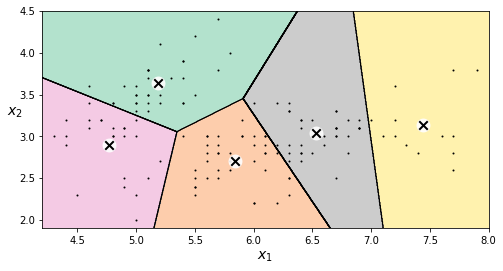

In [73]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [75]:
kmeans.transform(X_new)

array([[ 5.43981273,  5.88245505,  4.84934847,  7.52391847,  6.61678854],
       [ 2.73250114,  2.92678461,  1.9789342 ,  4.58023797,  3.68464753],
       [ 8.2122812 ,  8.84431355,  7.76742217, 10.43928062,  9.5343035 ],
       [ 8.26613952,  8.84201246,  7.77653611, 10.45750205,  9.54960986]])

### Centroid initialization

In [85]:
good_init = np.array([[-3,3], [-3,2], [-3,1], [-1,2], [0,2]])
kmeans = KMeans(n_clusters=5, init = good_init, n_init = 1)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1)

In [86]:
kmeans.inertia_

26.996265338567866

In [93]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters = 5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

### Choosing number of clusters

In [95]:
from sklearn.metrics import silhouette_score
# per n_cluster, higher better
silhouette_score(X,kmeans.labels_)

0.42035811301772896

### Clustering for image segmentation

#### Color Segmentation

In [111]:
from matplotlib.image import imread
image = imread("images/unsupervised_learning/ladybug.png")

In [112]:
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

In [113]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

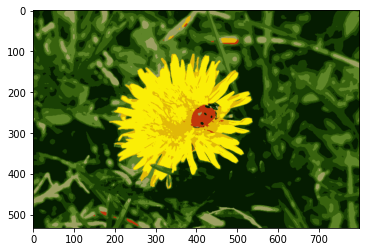

In [118]:
plt.imshow(segmented_img)

### Clustering for dimensionality reduction

In [120]:
from sklearn.datasets import load_digits
X_digits,y_digits = load_digits(return_X_y=True)

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X_digits,y_digits, )

In [143]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [144]:
# Baseline
log_reg.score(X_test,y_test)

0.9622222222222222

In [145]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans",KMeans(n_clusters = 99)),
    ("log_reg",LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=99)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [146]:
pipeline.score(X_test,y_test)

0.9866666666666667

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters = range(2,100))
grid_clf = GridSearchCV(pipeline,param_grid, cv = 3, verbose = 2)
grid_clf.fit(X_train,y_train)

In [148]:
grid_clf.best_estimator_.score(X_test,y_test)

0.9844444444444445

### Semi Supervised Learning

In [150]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [151]:
log_reg.score(X_test,y_test)

0.8177777777777778

In [169]:
k = 50
kmeans = KMeans(n_clusters =k, random_state = 42)
X_digits_dist = kmeans.fit_transform(X_train)
rep_digits_idx = np.argmin(X_digits_dist,axis = 0)
X_rep_digits = X_train[rep_digits_idx]

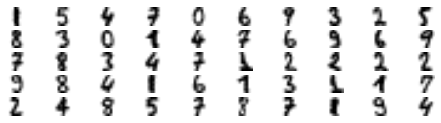

In [170]:
plt.figure(figsize=(8, 2))
for index, X_rep_digit in enumerate(X_rep_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_rep_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [171]:
y_train[rep_digits_idx]

array([1, 5, 4, 7, 0, 6, 9, 3, 2, 5, 8, 3, 0, 1, 4, 7, 6, 9, 6, 9, 7, 8,
       3, 4, 7, 1, 2, 2, 2, 2, 9, 8, 4, 1, 6, 1, 3, 1, 1, 7, 2, 4, 8, 5,
       7, 8, 7, 1, 9, 4])

In [172]:
y_rep =  np.array([1, 5, 4, 7, 0, 6, 9, 3, 2, 5, 8, 3, 0, 1, 4, 7, 6, 9, 6, 9, 7, 8,
       3, 4, 7, 1, 2, 2, 2, 2, 9, 8, 4, 1, 6, 1, 3, 1, 1, 7, 2, 4, 8, 5,
       7, 8, 7, 1, 9, 4])

In [173]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_rep_digits,y_rep)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [174]:
log_reg.score(X_test,y_test)

0.9088888888888889

In [176]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_rep[i]
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train,y_train_propagated)
log_reg.score(X_test,y_test)

0.9444444444444444